In [41]:
import numpy as np
from IPython.display import Audio
import matplotlib.pyplot as plt
import wave

input_file = r"c:\Users\nicke\Downloads\RT_Tabla_Violin_Violin_14_Strings_Athena_Koumis_one_shot.wav"
output_file = r"c:\Users\nicke\Downloads\output.wav"

In [42]:
def litmus_test(input_file, output_file):
 
    with wave.open(input_file, 'rb') as wave_file:
        params = wave_file.getparams()
        num_frames = params.nframes
        sample_width = params.sampwidth
        sample_rate = params.framerate

        # Read audio data
        audio_data = np.frombuffer(wave_file.readframes(num_frames), dtype=np.int16)

    
        with wave.open(output_file, 'wb') as output_wave:
            output_wave.setparams(params)
            output_wave.writeframes(audio_data.tobytes())

litmus_test(input_file, output_file)

In [45]:
def compress_audio(audio_data, threshold, ratio, attack_time, release_time, sample_rate, look_behind_smp):
    attack_smp = attack_time / sample_rate
    release_smp = release_smp / sample_rate

    # Convert to float for processing
    audio_data_float = audio_data.astype(np.float32)
    audio_data_float = audio_data_float / 2**15
    print(audio_data_float[100:120])
    audio_data_preserved = np.copy(audio_data_float)

    # Plot waveform
    plt.plot(audio_data_float)
    plt.title("Input waveform")
    plt.show()

    envelope = np.zeros_like(audio_data_float)
    #attack_coeff = np.exp(-1 / (attack_time * 0.001 * sample_rate))
    #release_coeff = np.exp(-1 / (release_time * 0.001 * sample_rate))
    attack_coeff = 1
    release_coeff = 1

    
    for i in range(1, len(audio_data_float)):
        # Calculate compression envelope
        # envelope[i] = max(envelope[i - 1] * release_coeff, abs(audio_data_float[i]))

        # Calculate compression envelope in RMS
        for j in range(0, look_behind_smp):
            # Calculate the RMS amplitude of the signal for look_behind_smp samples behind the current ptr (if available)
            # Use audio_data_preserved to get preserved, unedited values
            rms_amp = 1 # Placeholder
            envelope[i] = max(0, rms_amp)

        # Apply compression (no attack time)
        target_gain = threshold + max(0, (envelope[i] - threshold) / ratio)
        gain_factor = target_gain / envelope[i]
        audio_data_float[i] *= gain_factor

        # Apply compression (with release time)
        #average_val = 0
        #for j in range(0, release_smp):
        #    average_val += envelope[i - j]
        #average_val /= release_smp
        # Apply compression based on this amplitude val

        # Print info
        if i % 100 == 1:
            print(f"envelope[%d] = %.5f" % (i, envelope[i]))
            print(f"gain_reduction[%d] = %.5f" % (i, gain_reduction))
            print(f"division_factor[%d] = %.5f" % (i, gain_reduction + 1))
            print()

    # Plot waveform
    plt.plot(audio_data_float)
    plt.title("Modified waveform")
    plt.show()

    # Convert back to int for output
    audio_data_float = audio_data_float * 2**15
    audio_data_float = np.clip(audio_data_float, -32768, 32767)
    output = audio_data_float.astype(np.int16)
    print(output[100:120])
    return output
    

[0.01226807 0.01751709 0.01965332 0.0177002  0.01300049 0.00732422
 0.00469971 0.00863647 0.01843262 0.03204346 0.04486084 0.05258179
 0.05142212 0.04138184 0.02664185 0.01190186 0.00286865 0.00204468
 0.00994873 0.02471924]


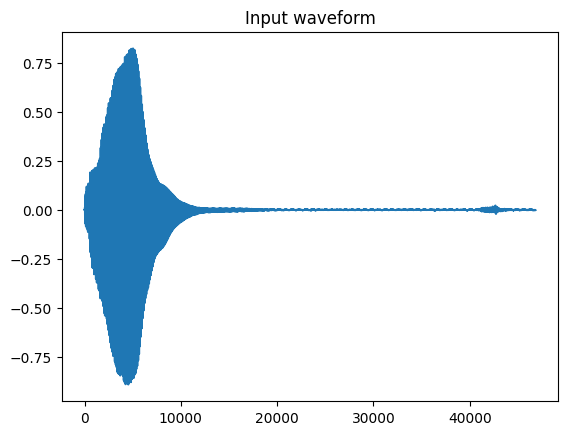

envelope[1] = 0.00024
gain_reduction[1] = 0.00000
division_factor[1] = 1.00000

envelope[101] = 0.06924
gain_reduction[101] = 0.00000
division_factor[101] = 1.00000

envelope[201] = 0.09171
gain_reduction[201] = 0.00000
division_factor[201] = 1.00000

envelope[301] = 0.11880
gain_reduction[301] = 0.00000
division_factor[301] = 1.00000

envelope[401] = 0.11880
gain_reduction[401] = 0.00000
division_factor[401] = 1.00000

envelope[501] = 0.13449
gain_reduction[501] = 0.00000
division_factor[501] = 1.00000

envelope[601] = 0.19138
gain_reduction[601] = 0.00000
division_factor[601] = 1.00000

envelope[701] = 0.21695
gain_reduction[701] = 0.00000
division_factor[701] = 1.00000

envelope[801] = 0.24133
gain_reduction[801] = 0.00000
division_factor[801] = 1.00000

envelope[901] = 0.29391
gain_reduction[901] = 0.00000
division_factor[901] = 1.00000

envelope[1001] = 0.32867
gain_reduction[1001] = 0.00000
division_factor[1001] = 1.00000

envelope[1101] = 0.32867
gain_reduction[1101] = 0.00000
d

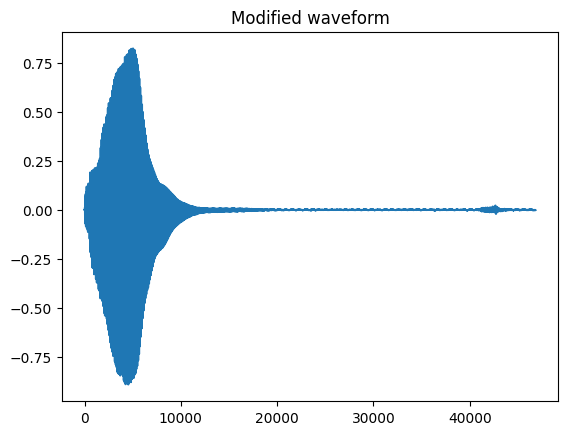

[ 402  574  644  580  426  240  154  283  604 1050 1470 1723 1685 1356
  873  390   94   67  326  810]


In [44]:
def audio_compressor(input_file, output_file, threshold, ratio, attack_time, release_time):
 
    with wave.open(input_file, 'rb') as wave_file:
        params = wave_file.getparams()
        num_frames = params.nframes
        sample_width = params.sampwidth
        sample_rate = params.framerate

        # Read audio data
        audio_data = np.frombuffer(wave_file.readframes(num_frames), dtype=np.int16)

        # Apply compression
        compressed_audio = compress_audio(audio_data, threshold, ratio, attack_time, release_time, sample_rate)

    
        with wave.open(output_file, 'wb') as output_wave:
            output_wave.setparams(params)
            output_wave.writeframes(compressed_audio.tobytes())

audio_compressor(input_file, output_file, threshold=20, ratio=4, attack_time=10, release_time=100)